In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 100

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

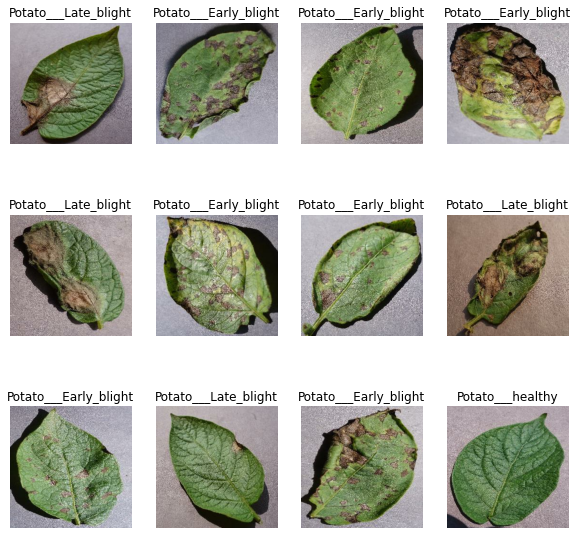

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
len(dataset)

68

In [ ]:
#80% ==> training
#20% ==> 10% validation, 10% test

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1, test_split=0.1, shuffle=True, shuffle_size = 10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size,seed = 12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation= 'relu',input_shape =input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')

])

model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds,
)

Epoch 1/100
54/54 [==============================] - 196s 166ms/step - loss: 0.9194 - accuracy: 0.5064 - val_loss: 1.0573 - val_accuracy: 0.3802
Epoch 2/100
54/54 [==============================] - 5s 92ms/step - loss: 0.8234 - accuracy: 0.6047 - val_loss: 0.6243 - val_accuracy: 0.7292
Epoch 3/100
54/54 [==============================] - 5s 92ms/step - loss: 0.5302 - accuracy: 0.7772 - val_loss: 0.4428 - val_accuracy: 0.7917
Epoch 4/100
54/54 [==============================] - 5s 92ms/step - loss: 0.3823 - accuracy: 0.8345 - val_loss: 0.4349 - val_accuracy: 0.8490
Epoch 5/100
54/54 [==============================] - 5s 93ms/step - loss: 0.3050 - accuracy: 0.8785 - val_loss: 0.4593 - val_accuracy: 0.8333
Epoch 6/100
54/54 [==============================] - 5s 93ms/step - loss: 0.2477 - accuracy: 0.9045 - val_loss: 0.1366 - val_accuracy: 0.9531
Epoch 7/100
54/54 [==============================] - 5s 93ms/step - loss: 0.1790 - accuracy: 0.9323 - val_loss: 0.2346 - val_accuracy: 0.9010
Epo

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 34ms/step - loss: 0.0333 - accuracy: 0.9922


In [ ]:
scores

[0.033341653645038605, 0.9921875]

In [ ]:
history.history["accuracy"]

[0.5063657164573669,
 0.6047453880310059,
 0.7771990895271301,
 0.8344907164573669,
 0.8784722089767456,
 0.9045138955116272,
 0.9322916865348816,
 0.9363425970077515,
 0.9479166865348816,
 0.9513888955116272,
 0.9681712985038757,
 0.9658564925193787,
 0.9681712985038757,
 0.9456018805503845,
 0.9722222089767456,
 0.9803240895271301,
 0.9537037014961243,
 0.9444444179534912,
 0.9722222089767456,
 0.9820601940155029,
 0.9733796119689941,
 0.9780092835426331,
 0.9826388955116272,
 0.9849537014961243,
 0.9832175970077515,
 0.9890046119689941,
 0.9901620149612427,
 0.9728009104728699,
 0.9907407164573669,
 0.9803240895271301,
 0.9820601940155029,
 0.9710648059844971,
 0.9820601940155029,
 0.9872685074806213,
 0.9890046119689941,
 0.9849537014961243,
 0.9803240895271301,
 0.9832175970077515,
 0.9884259104728699,
 0.9872685074806213,
 0.9890046119689941,
 0.9947916865348816,
 0.9942129850387573,
 0.9866898059844971,
 0.9791666865348816,
 0.9901620149612427,
 0.9930555820465088,
 0.9762731194

In [ ]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

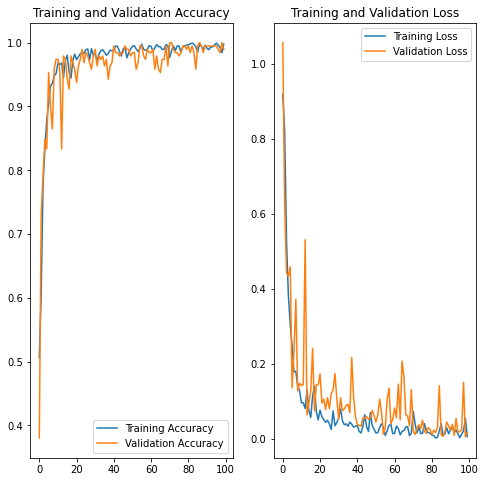

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label = "Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss , label = "Training Loss")
plt.plot(range(EPOCHS), val_loss , label = "Validation Loss")
plt.legend(loc = "upper right")
plt.title("Training and Validation Loss")
plt.show()

first image to predict
actual label:  Potato___Late_blight
1/1 [==============================] - 0s 30ms/step
predicted label: Potato___Late_blight


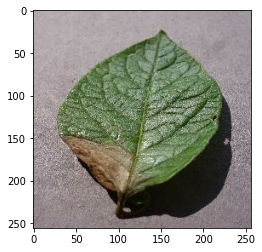

In [ ]:
import numpy as np
for images_batch , labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype("uint8")
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label: ",class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100* (np.max(predictions[0])),2)
  return predicted_class , confidence

1/1 [==============================] - 0s 16ms/step


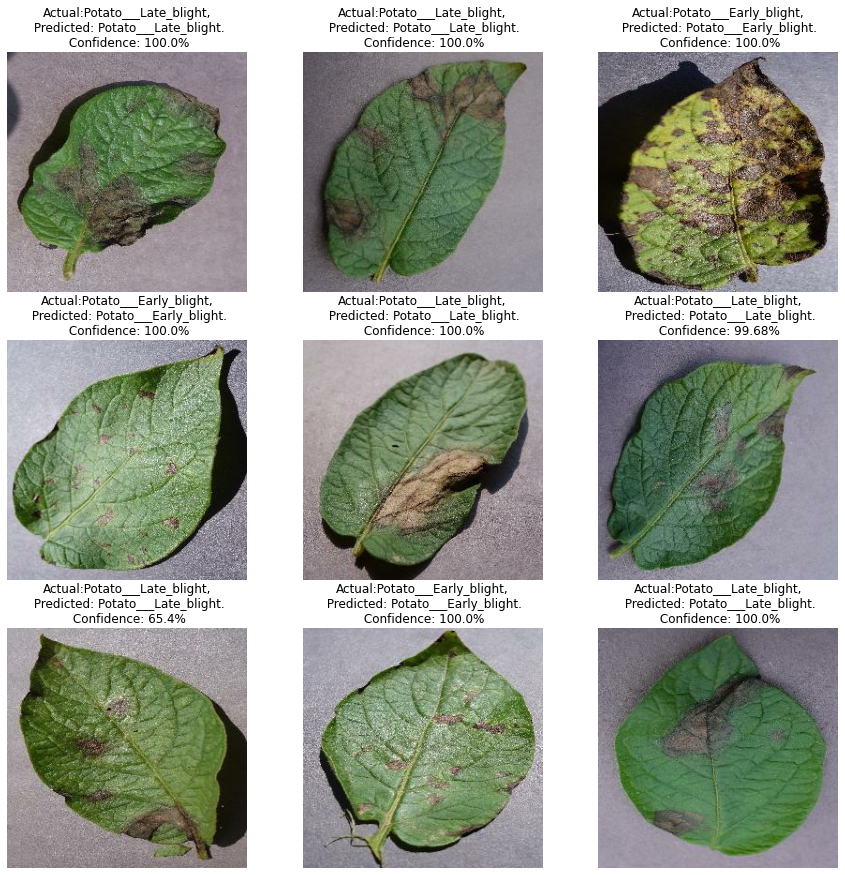

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3 , 3 , i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class , confidence  = predict(model, images[i].numpy())
    actual_class = class_names [labels[i]]

    plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis("off")

In [ ]:

model.save("saved/potato")

In [ ]:
potato = tf.keras.models.load_model("saved/potato")
potato.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [ ]:
model.save("saved/potato.h5")

In [ ]:
new_model = tf.keras.models.load_model('saved/potato.h5')

In [ ]:
pre  = new_model.predict(test_ds)


8/8 [==============================] - 0s 30ms/step


In [ ]:
# mobile = tf.lite.TFLiteConverter.from_saved_model("saved/potato")
# tfmodel = mobile.convert()
# open("mobile.tflite","wb").write(tfmodel)

In [ ]:
# from tensorflow.python import keras
# import tensorflow

# modelnew = keras.models.load_model("saved/potato.h5")
# # model.load_weights('save_at_47.h5')

# converter = tensorflow.lite.TFLiteConverter.from_keras_model(modelnew)
# tflite_model = converter.convert()
# open("converted_model.tflite","wb").write(tflite_model)



In [ ]:
# model.save("saved/potato/",{labels},".txt")
# labels = tf.lite..from_saved_model("saved/potato")
# tfmodel = mobile.convert()
# open("mobile.tflite","wb").write(tfmodel)

In [ ]:
labels_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int32)>

In [ ]:
label_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int32)>

In [ ]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 1, 0], dtype=int32)>

In [ ]:
first_label

2

In [ ]:
class_names[labels[2]]

'Potato___Early_blight'